# Week 1: Understanding the Data

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML preprocessing and models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Model saving/loading
import joblib  

# Web app
import streamlit as st

In [2]:
# Set a clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
}) 

In [3]:
# Load the dataset
df = pd.read_csv("flood.csv")

In [4]:
# First look at the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [5]:
# Info about dataset (columns, datatypes, non-null counts)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  Coa

In [6]:
# Statistical summary (only for numerical columns)
print("\nStatistical Summary:")
display(df.describe())


Statistical Summary:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [7]:
# Missing values check
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [8]:
# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [9]:
# Number of unique values per column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values per column:
MonsoonIntensity: 17 unique values
TopographyDrainage: 18 unique values
RiverManagement: 17 unique values
Deforestation: 18 unique values
Urbanization: 18 unique values
ClimateChange: 18 unique values
DamsQuality: 17 unique values
Siltation: 17 unique values
AgriculturalPractices: 17 unique values
Encroachments: 18 unique values
IneffectiveDisasterPreparedness: 17 unique values
DrainageSystems: 18 unique values
CoastalVulnerability: 18 unique values
Landslides: 17 unique values
Watersheds: 17 unique values
DeterioratingInfrastructure: 18 unique values
PopulationScore: 18 unique values
WetlandLoss: 19 unique values
InadequatePlanning: 17 unique values
PoliticalFactors: 17 unique values
FloodProbability: 83 unique values


# Week 2: Exploratory Data Analysis (EDA), Data Transformation, and Feature Selection

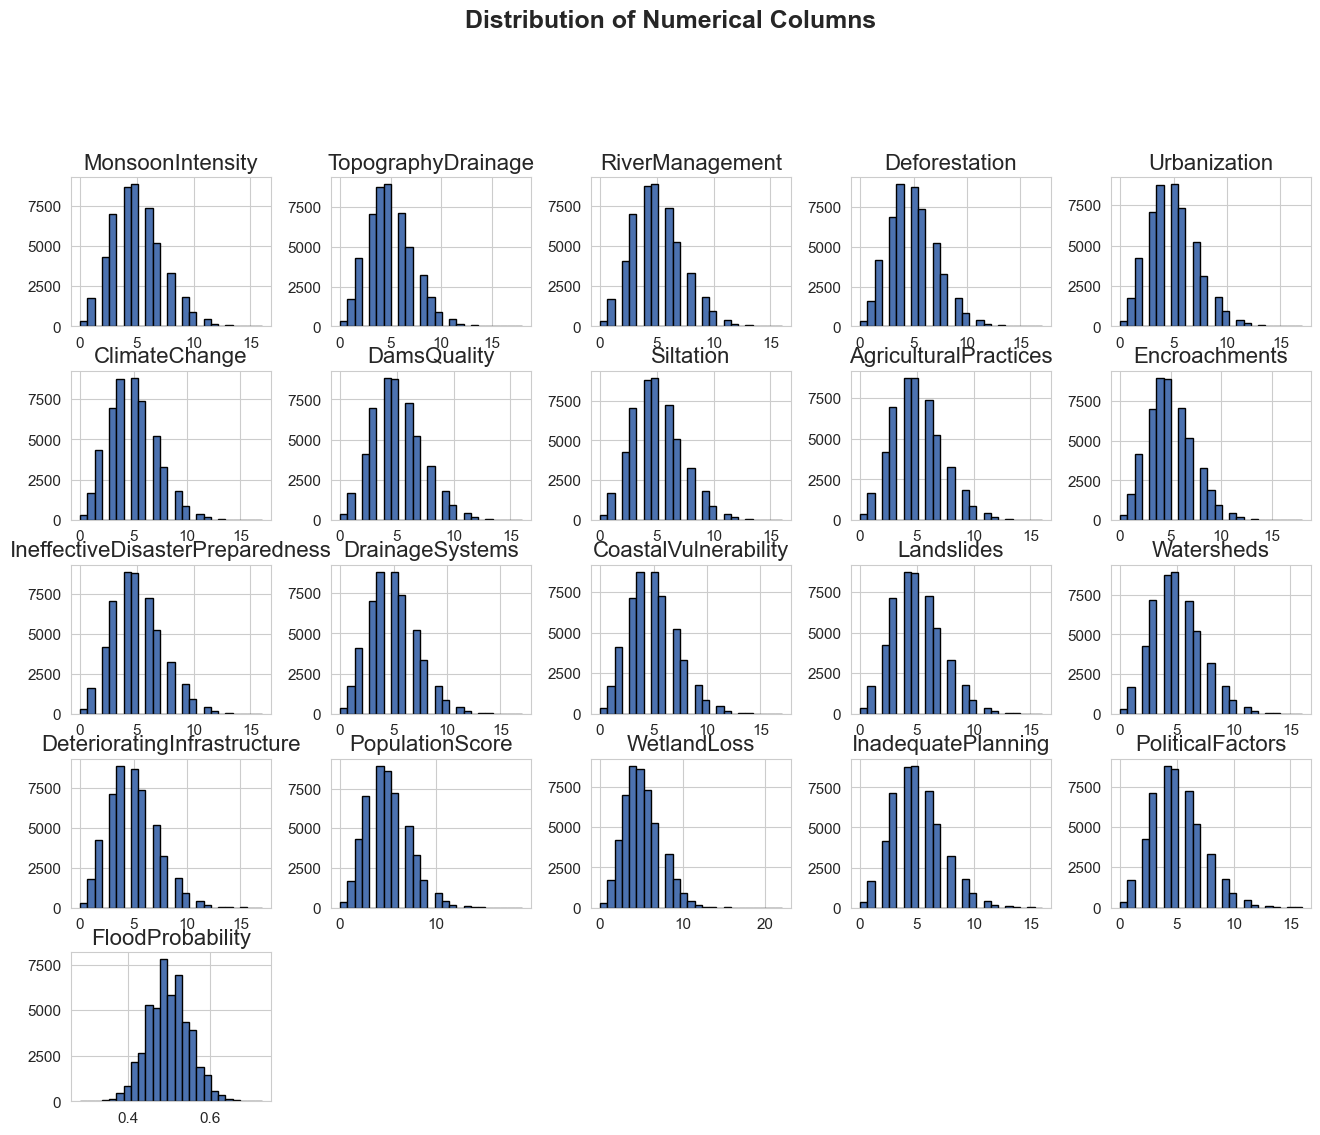

In [10]:
# Distribution of numerical columns
df.hist(figsize=(16, 12), bins=25, edgecolor="black", color="#4C72B0")
plt.suptitle("Distribution of Numerical Columns", fontsize=18, weight="bold", y=1.02)
plt.show()

In [11]:
# Correlation matrix (numerical features only)
print("\nCorrelation Matrix:")
display(df.corr())


Correlation Matrix:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


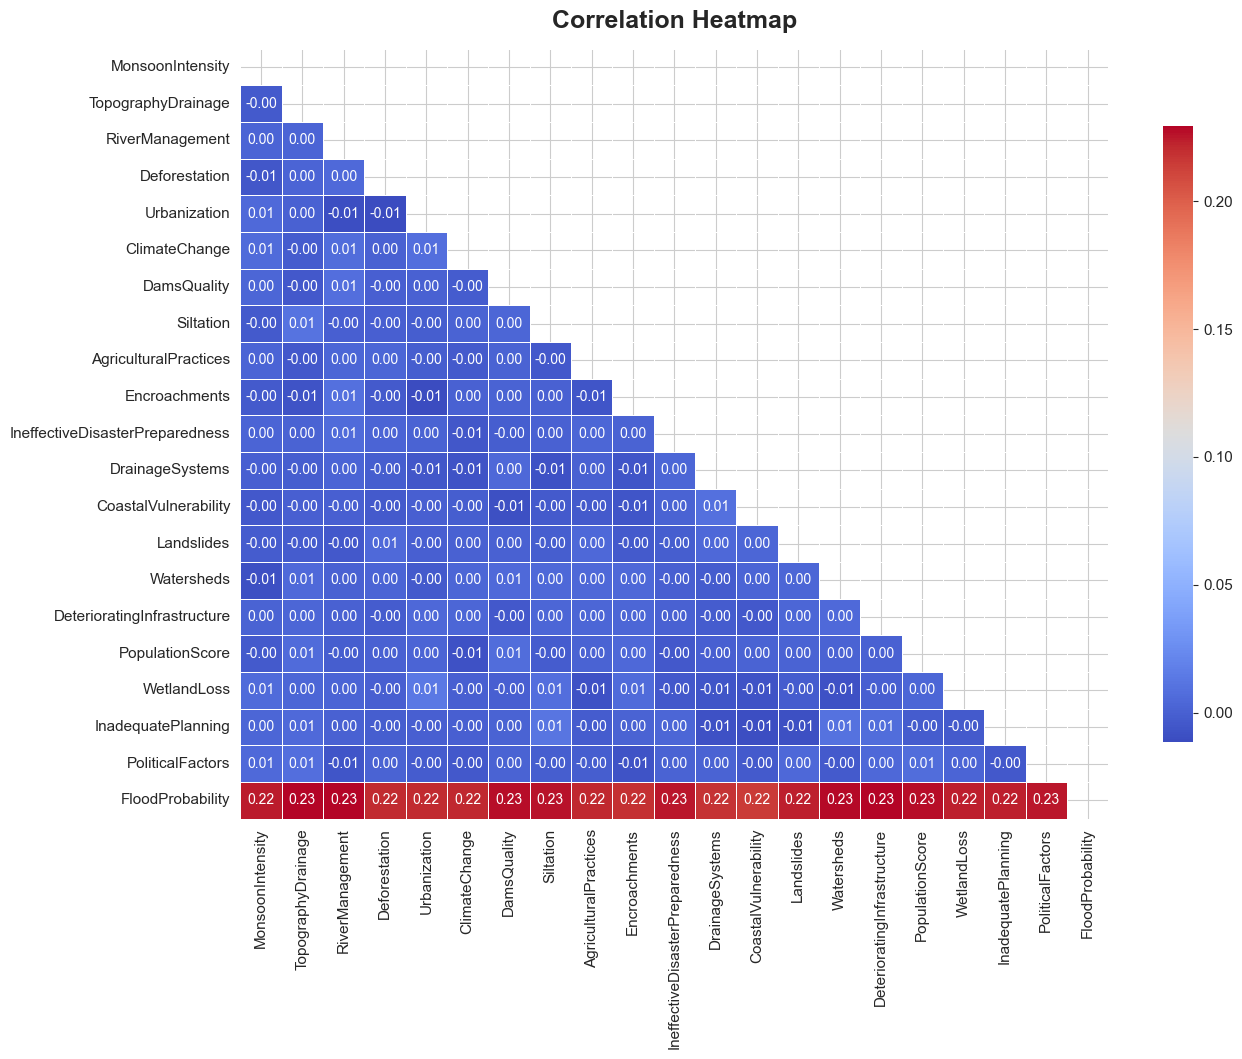

In [12]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Show upper triangle only
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=18, weight="bold", pad=15)
plt.show()

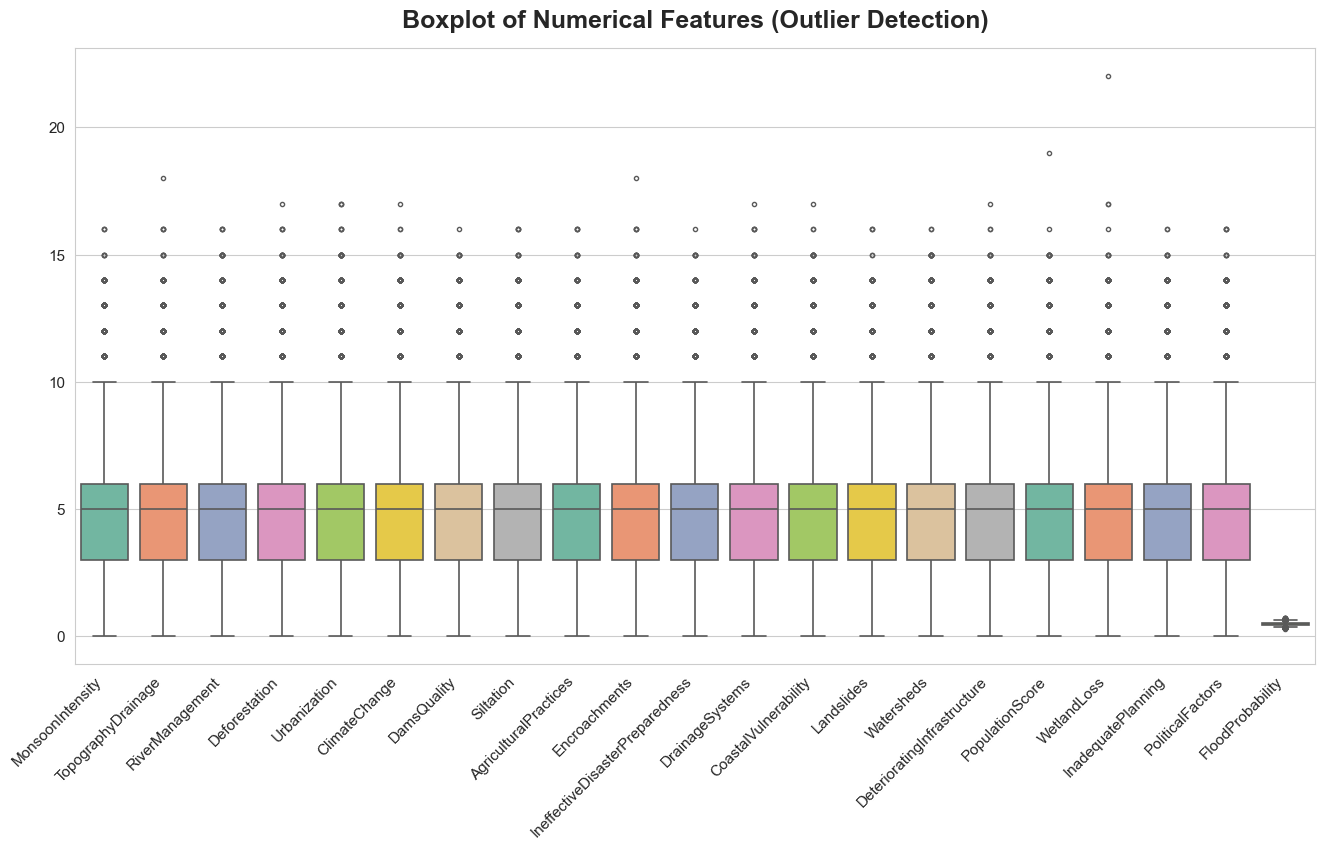

In [13]:
# Boxplots for detecting outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), 
            palette="Set2", fliersize=3, linewidth=1.2)
plt.title("Boxplot of Numerical Features (Outlier Detection)", 
          fontsize=18, weight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [14]:
# Check skewness of numerical features
print("\nSkewness of numerical features:")
print(df.skew())


Skewness of numerical features:
MonsoonIntensity                   0.435061
TopographyDrainage                 0.468026
RiverManagement                    0.432706
Deforestation                      0.452334
Urbanization                       0.473563
ClimateChange                      0.444346
DamsQuality                        0.444013
Siltation                          0.459471
AgriculturalPractices              0.425494
Encroachments                      0.459761
IneffectiveDisasterPreparedness    0.441500
DrainageSystems                    0.456434
CoastalVulnerability               0.458631
Landslides                         0.428130
Watersheds                         0.470939
DeterioratingInfrastructure        0.445130
PopulationScore                    0.462230
WetlandLoss                        0.444226
InadequatePlanning                 0.459092
PoliticalFactors                   0.447474
FloodProbability                   0.095412
dtype: float64


In [15]:
# Apply Standard Scaler (normalization)
scaler = StandardScaler()

In [16]:
X = df.drop("FloodProbability", axis=1)  # independent variables
y = df["FloodProbability"]               # target variable
X_scaled = scaler.fit_transform(X)  # scaled features

In [17]:
# Convert scaled features back into DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFirst 5 rows after scaling:")
display(X_scaled_df.head())


First 5 rows after scaling:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,-0.890321,1.342509,0.441028,0.446084,-0.440927,-0.443851,0.438597,-1.338607,-0.897767,-1.341169,-0.002255,2.231345,0.890080,-0.441806,-1.334944,-0.891125,-0.440066,-0.898457,-1.342769,0.449446
1,1.345004,-0.438066,-0.007144,0.895983,0.896486,1.801586,-1.788597,0.005106,-0.002739,-0.448954,0.446970,1.784535,-1.335031,0.455973,-1.334944,-1.787539,-1.780394,1.790031,-1.791202,-0.886231
2,-0.890321,2.232796,-0.455316,-1.803411,0.896486,0.005236,-0.452281,0.900915,-0.450253,1.781585,-1.349932,0.890914,-0.444987,-0.441806,1.353026,0.453496,-1.780394,1.341950,-0.894336,0.449446
3,-0.443256,-0.438066,-1.351659,0.895983,-0.886732,-0.443851,-1.788597,-0.442798,0.444776,-0.448954,1.794647,-0.449518,-1.335031,0.455973,0.457036,1.349910,1.347039,0.445787,0.450962,2.230349
4,-0.890321,0.897365,-0.007144,-1.353512,0.004877,1.352498,-0.006842,-1.338607,0.892290,-0.002846,0.896196,0.890914,0.445058,0.007083,-0.886949,-0.891125,-0.440066,-0.450375,-0.894336,-0.441005


In [18]:
# Skewness
print("\nSkewness of numerical features:")
print(df.skew())


Skewness of numerical features:
MonsoonIntensity                   0.435061
TopographyDrainage                 0.468026
RiverManagement                    0.432706
Deforestation                      0.452334
Urbanization                       0.473563
ClimateChange                      0.444346
DamsQuality                        0.444013
Siltation                          0.459471
AgriculturalPractices              0.425494
Encroachments                      0.459761
IneffectiveDisasterPreparedness    0.441500
DrainageSystems                    0.456434
CoastalVulnerability               0.458631
Landslides                         0.428130
Watersheds                         0.470939
DeterioratingInfrastructure        0.445130
PopulationScore                    0.462230
WetlandLoss                        0.444226
InadequatePlanning                 0.459092
PoliticalFactors                   0.447474
FloodProbability                   0.095412
dtype: float64


# Week 3: Predictive Modelling

In [19]:
# Convert FloodProbability → categorical FloodRisk
def categorize_risk(prob):
    if prob < 0.45:
        return "Low"
    elif prob < 0.55:
        return "Medium"
    else:
        return "High"

df["FloodRisk"] = df["FloodProbability"].apply(categorize_risk)

print("\nFlood Risk Distribution:")
print(df["FloodRisk"].value_counts())



Flood Risk Distribution:
FloodRisk
Medium    34278
High       8373
Low        7349
Name: count, dtype: int64


In [20]:
# Features and Target
X = df.drop(["FloodProbability", "FloodRisk"], axis=1)
y = df["FloodRisk"]

In [21]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# Train model
model = RandomForestClassifier(random_state=42, n_estimators=200)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7493

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.20      0.34      1674
         Low       1.00      0.20      0.34      1470
      Medium       0.73      1.00      0.85      6856

    accuracy                           0.75     10000
   macro avg       0.91      0.47      0.51     10000
weighted avg       0.82      0.75      0.69     10000



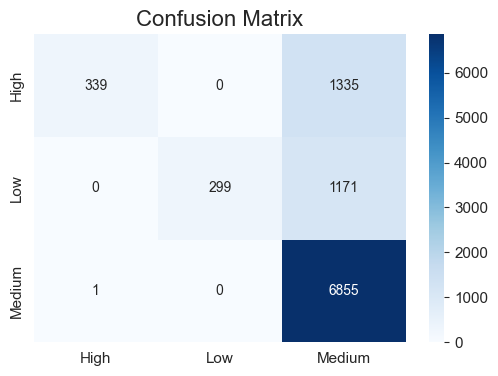

In [26]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix", fontsize=16)
plt.show()


In [27]:
# Save model and scaler
joblib.dump(model, "flood_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!
